__Adults Income Data Analysis Project__

I conduct this project as part of a weekly challenge started by Data in Motion - An Atlanta based data analytics training company.

I respond to this problem:

__Analyzing Adult Income__

You are a data analyst at a market research firm that specializes in demographic and economic studies. Your firm has been contracted by a government agency to analyze various factors influencing the income levels of adults in the United States.

The agency aims to understand how different demographic attributes, work characteristics, and other socio-economic factors contribute to whether an individual earns more or less than $50,000 annually. This analysis will help in formulating policies to improve economic conditions and employment opportunities for different segments of the populati

__Business Problem__

The primary objective is to identify the key factors that determine whether an individual earns more than $50,000 per year. By understanding these factors, the agency can tailor its policies to target specific groups that need the most support and improve overall economic well-being

__Summary of What I do__

I explore the data, clean by adressing misisng values, and then create visualizations to help understand the demographics and their association iwth income. I further conduct statistical analysis using __logistic regression__ to understand how certain demographics such as education level, occupation, and work class influence the likelihood of earning more than $50K income annually. I further train and compare different __machine learning models__ to predict if an individual belongs to the >50K income category or <=50K income category.

__Summary of Results__

__Work class__

- Logistic regression revealed that, working in the corporate sector is associated with the highest likelihood of earning more than 50K annually.
- Working in the other work classes such as Federal government, State government, local government, private sector, self employed not incorporated reduces the likelihood of earning more than 50K annually. Such sectors should be a target if the ploicy makers ought to get more people to earn more than 50K annually.

__Occupation__

- Working in the following occupations: Exec managerial, Professional services, Protective service, Tech support, Sales, Craft repair, and Transport moving -respectively, is associated with higher probabilities of earning more than 50K.
- On the other hand, working in fish farming, machine operators, private house services, armed forces, handlers/cleaners, and other services occupation reduces the likelihood of earning more than  50K annually. Targeting people working in such occupations can help get more people to earn more than 50K annually.

__Education__

- Logistic regression on income versus education level and hours per week indicated that working an extra hour per week increases the likelihood of earning more than 50K annually by 50%.
- Additionally, the people with the highest level of education such as those with doctorate, masters, bachelors, some college level had the highest likelihood of earning more than 50K annualy.
- Whereas, people with pre-school level, or up to 11th grade level of education and below exhibited lower odds of earning more than 50K. This could point to the need for policy makers to invest more in improving education levels since this increases the likelihood of one earning more than 50K annually.

__Machine Learning__

- I trained various classifier models such as Logistic regression, RandomForest, XGBoost, Neural networks, GradietBoosting Classfier, knn classifier, Naive Bayes classifier. XGBoost had the best performance metrics resulting in a 86% accuracy in classifying into <=50K and >50K income categories.
- The Limitation I faced was that the data was quite imbalanced with more data points coming from the <=50K category (75% of the data).
.on.

In [234]:
#Import necessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [448]:
# Change the working directory to where the data file is located
os.chdir('C:/Users/moger/OneDrive/Desktop/Week3_Challenge')

# Specify the absolute path to the data file
file_path = 'C:/Users/moger/OneDrive/Desktop/Week3_Challenge/Raw_Data/adult.csv'

# Load the raw data
df_raw = pd.read_csv(file_path)

# Display the first few rows of the data
display(df_raw.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [222]:
#with the question markes in some records under workclass and occupation, it already seems like the data will need some cleaning

#Explore the shape of the data as well as the number of missing records for each variables
print(df_raw.shape) #Data has 32651 records
print(df_raw.info())#Shows no null records, however this is due to the fact that the null records have "?" 

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [450]:
#I will replace the question marks with NA
df_raw.replace('?', np.nan, inplace=True)


In [256]:
display(df_raw.head(5)) #Now the ? marks have been replaced with NaN.


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [357]:
#Check how many are missing
print(df_raw.isnull().sum())#Will first explore the demographics with the NaNs present then see how the distribution changes afetr imputing

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [452]:
#I will impute missing values in the occupation and workclass variables using the most frequent

from sklearn.impute import SimpleImputer


# Initialize a SimpleImputer for categorical imputation (assuming 'most_frequent' strategy)
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Define the columns to impute 
columns_to_impute = ['workclass','occupation','native.country']  

# Fit and transform the imputer on df_raw
df_raw_imputed = pd.DataFrame(imputer_categorical.fit_transform(df_raw[columns_to_impute]), columns=columns_to_impute)

# Update df_raw with the imputed values
df_raw[columns_to_impute] = df_raw_imputed

In [436]:
display(df_raw.isnull().sum())#Now data has no nulls

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

__Challenge Questions__

__Q.1: Demographic Analysis:__

What are the demographic characteristics (age, education, marital status, race, sex) of individuals earning more than $50,000 annually compared to those earning less?
How do these characteristics vary between the two income groups?


In [294]:
#start with age
#Explore the age category to create categories 
print(df_raw['age'].describe())#create categories 17-28, 29-37,38-48,49 and over

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


In [296]:
#Create the categories
# Define the age bins and labels
bins = [17, 28, 37, 48, float('inf')]
labels = ['17-28', '29-37', '38-48', '49 and over']

# Create a new categorical variable based on the age bins
df_raw['age.category'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)

C:\Users\moger\Downloads\conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\moger\Downloads\conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


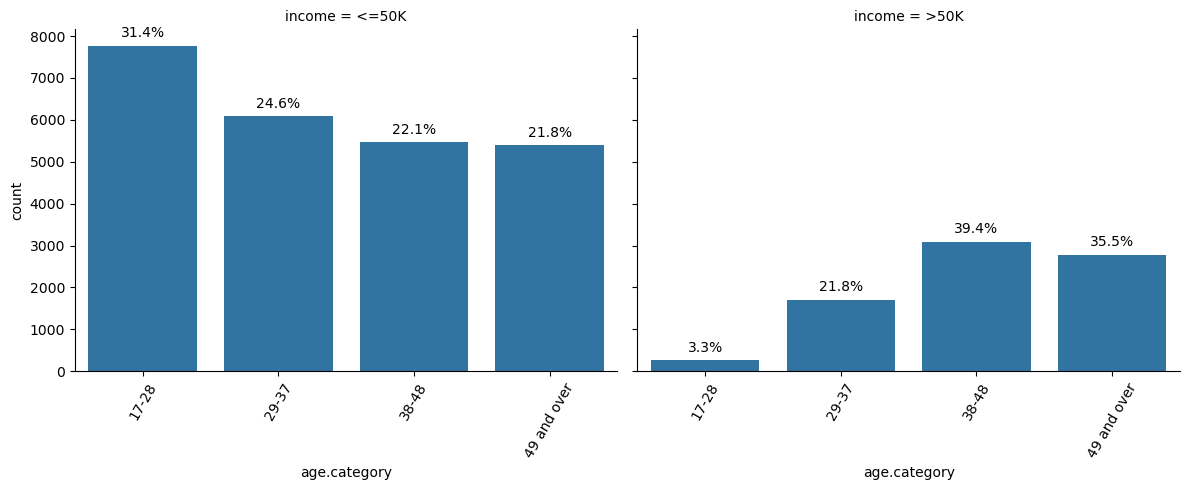

In [304]:
#Create a visual to explore the distribution
# Set up the Seaborn FacetGrid
g = sns.FacetGrid(df_raw, col='income', height=5, aspect=1.2)

# Create the count plot for each facet
g.map(sns.countplot, 'age.category', order=labels)

# Adjust the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(60)

# Add the percentages to the bars
def add_percentage(ax, **kwargs):
    for p in ax.patches:
        total = sum([patch.get_height() for patch in ax.patches])
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# Apply the percentage function to each facet
for ax in g.axes.flat:
    add_percentage(ax)

# Show the plot
plt.tight_layout()
plt.show()


__Interpretation__

Whereas those with an income <= 50K are mostly young people aged between 17-28, the other age groups are evenly distributed within this income group. On the other hand, those within the >50k category are aged 38 years and over. Implying that more __older people earn higher than younger people__.

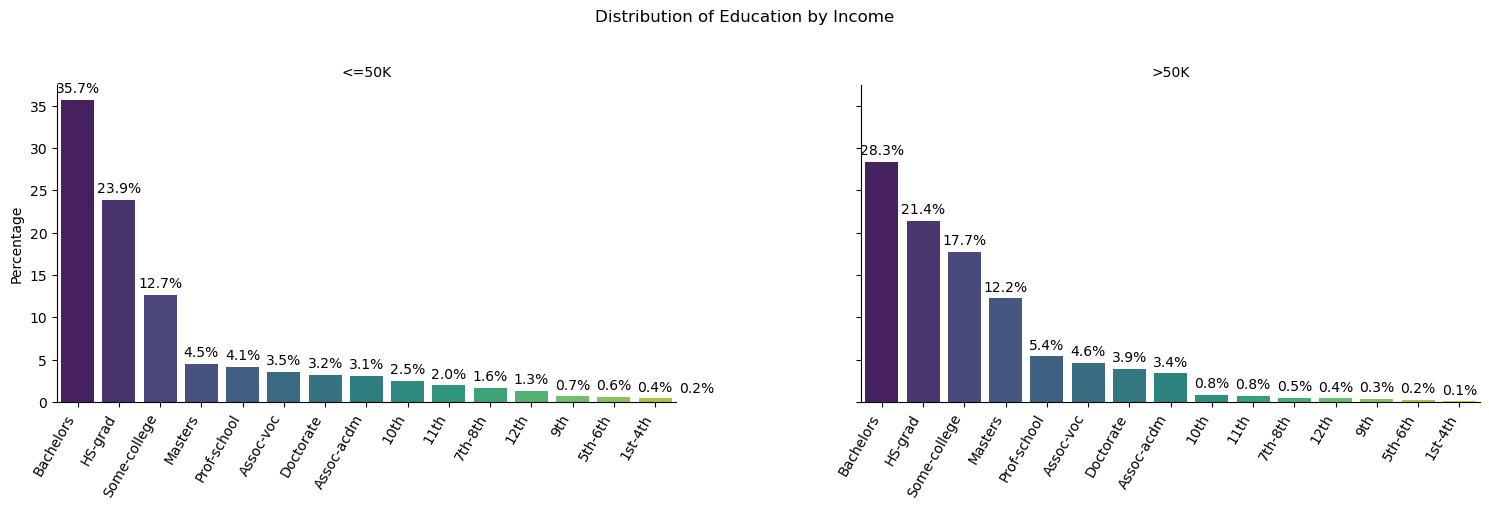

In [315]:
#Next, explore the education variable
# create a function to calculate percentages within each income category
def calculate_percentages_within_category(data, category_col, group_col):
    group_counts = data.groupby(group_col)[category_col].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
    return group_counts

#Calculate percentages within each income category
percentages_df_e = calculate_percentages_within_category(df_raw, 'education', 'income')

#Set up the FacetGrid 
g = sns.FacetGrid(percentages_df_e, col="income", height=5, aspect=1.5)

# Create a function for the facets
def barplot_with_percentages(data, **kwargs):
    ax = sns.barplot(x='education', y='percentage', data=data, palette='viridis', **kwargs)
    
    # Annotate the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

# Map the plotting function to the FacetGrid
g.map_dataframe(barplot_with_percentages)

# Adjust the spacing
g.fig.subplots_adjust(top=0.9, wspace=0.3)

# Add labels and title
g.set_axis_labels('', 'Percentage')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of Education by Income', y=1.05)

# Show the plot
plt.show()

__Interpretation__

In both categories, persons with Bachelors, high school graduants, and those how attended some college are the majority. However, there is a higher percenatge in the <=50K category than those earning higher than 50K.

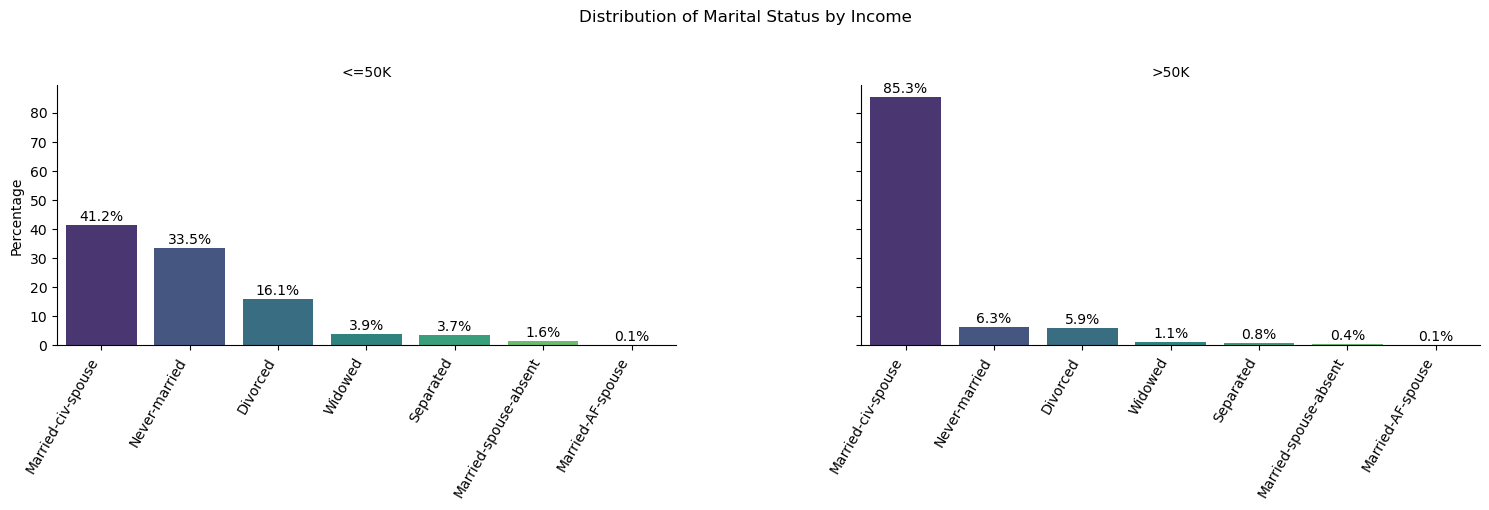

In [318]:
#Next, explore the marital status demographic
#Calculate percentages within each income category
percentages_df_m = calculate_percentages_within_category(df_raw, 'marital.status', 'income')

#Set up the FacetGrid 
m = sns.FacetGrid(percentages_df_m, col="income", height=5, aspect=1.5)

# Create a function for the facets
def barplot_with_percentages(data, **kwargs):
    ax = sns.barplot(x='marital.status', y='percentage', data=data, palette='viridis', **kwargs)
    
    # Annotate the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

# Map the plotting function to the FacetGrid
m.map_dataframe(barplot_with_percentages)

# Adjust the spacing
m.fig.subplots_adjust(top=0.9, wspace=0.3)

# Add labels and title
m.set_axis_labels('', 'Percentage')
m.set_titles(col_template='{col_name}')
m.fig.suptitle('Distribution of Marital Status by Income', y=1.05)

# Show the plot
plt.show()

__Interpretation__

Majority (85%) of those earning >50K are married to a civilian spouse, whereas the distribution in the <= 50K catgeory is even across the marital status categories with those married to a civilian spouse and those whoe were never married forming about 65% of this income category.

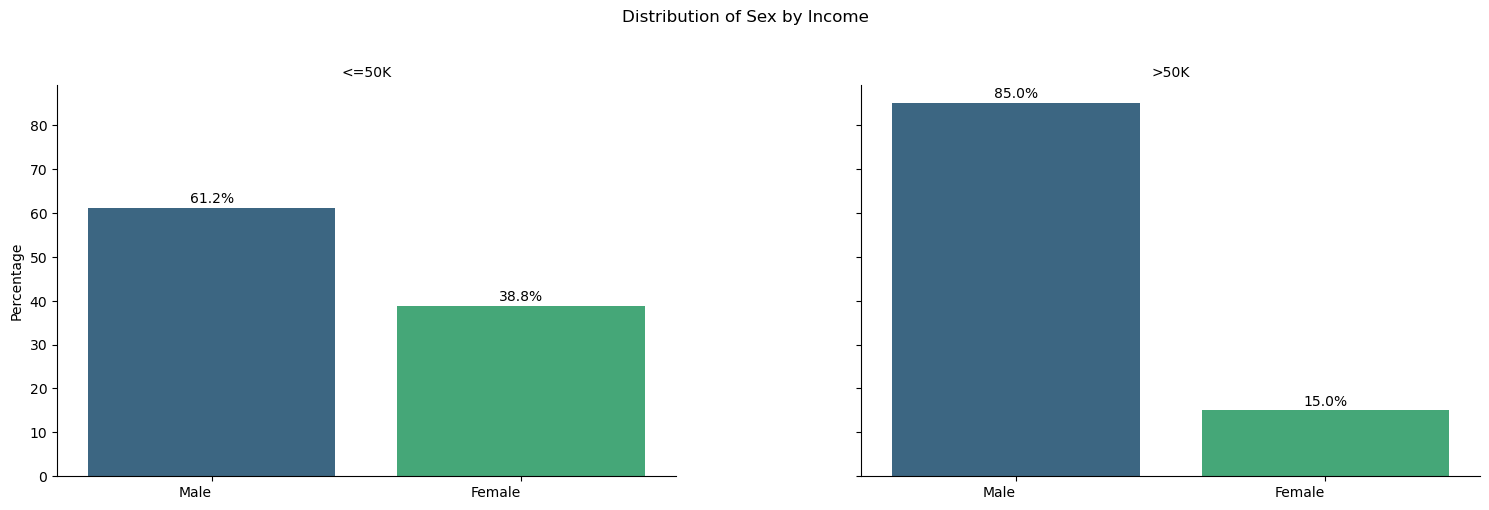

In [331]:
#Explore the distribution in the sex demographic
#Calculate percentages within each income category
percentages_df_s = calculate_percentages_within_category(df_raw, 'sex', 'income')

#Set up the FacetGrid 
m = sns.FacetGrid(percentages_df_s, col="income", height=5, aspect=1.5)

# Create a function for the facets
def barplot_with_percentages(data, **kwargs):
    ax = sns.barplot(x='sex', y='percentage', data=data, palette='viridis', **kwargs)
    
    # Annotate the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Map the plotting function to the FacetGrid
m.map_dataframe(barplot_with_percentages)

# Adjust the spacing
m.fig.subplots_adjust(top=0.9, wspace=0.3)

# Add labels and title
m.set_axis_labels('', 'Percentage')
m.set_titles(col_template='{col_name}')
m.fig.suptitle('Distribution of Sex by Income', y=1.05)

# Show the plot
plt.show()

__Interpretation__

In both categories, there are more males than females. However, in the >50K income category, 85% are males, whereas in the <50k category, there are more females than the females in the >50K category. This could point to the fact that __more males are likely to earn higher__.

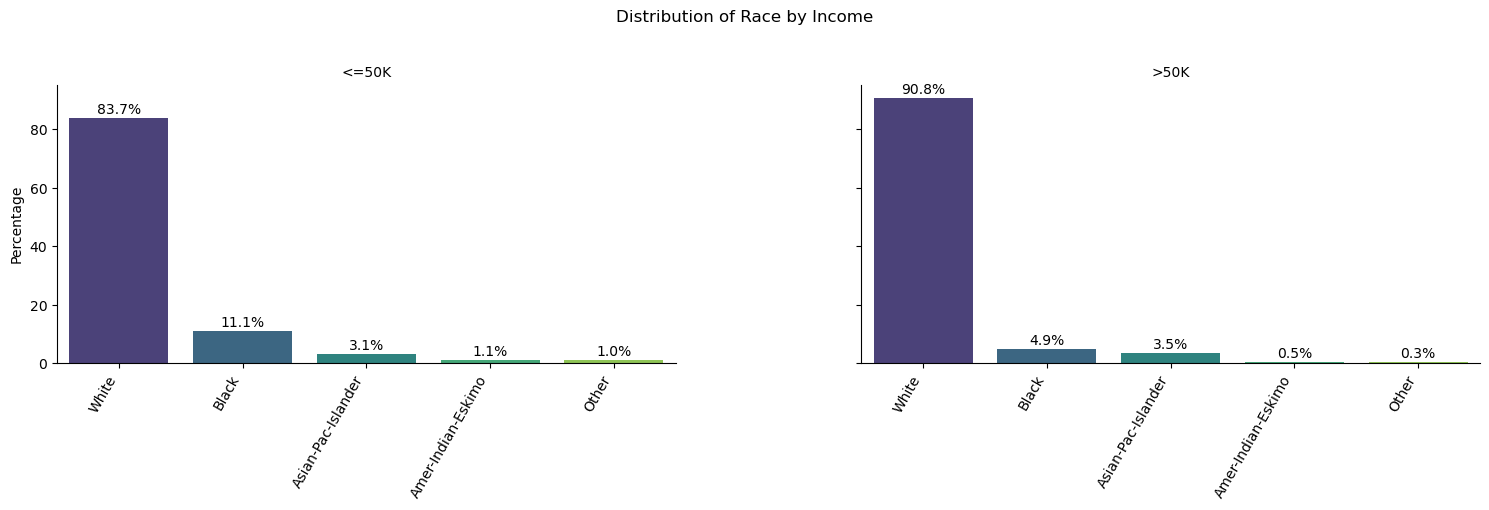

In [334]:
#Explore the race demographic
#Calculate percentages within each income category
percentages_df_r = calculate_percentages_within_category(df_raw, 'race', 'income')

#Set up the FacetGrid 
m = sns.FacetGrid(percentages_df_r, col="income", height=5, aspect=1.5)

# Create a function for the facets
def barplot_with_percentages(data, **kwargs):
    ax = sns.barplot(x='race', y='percentage', data=data, palette='viridis', **kwargs)
    
    # Annotate the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

# Map the plotting function to the FacetGrid
m.map_dataframe(barplot_with_percentages)

# Adjust the spacing
m.fig.subplots_adjust(top=0.9, wspace=0.3)

# Add labels and title
m.set_axis_labels('', 'Percentage')
m.set_titles(col_template='{col_name}')
m.fig.suptitle('Distribution of Race by Income', y=1.05)

# Show the plot
plt.show()

In both categories, there are more people of the white race. However, the proportion of white people is higher in the >50K category (91%) than in the <=50K category (84%). Could imply that being of the White race is associated with higher earning.

__Q.2: Work Class and Occupation:__- 
How do different work classes (e.g., Private, Self-Employed, Government) and occupations (e.g., Exec-managerial, Machine-op-inspct) impact the likelihood of earning more than $50,00
- ?
Are there specific work classes or occupations that are more likely to earn higher incomes?

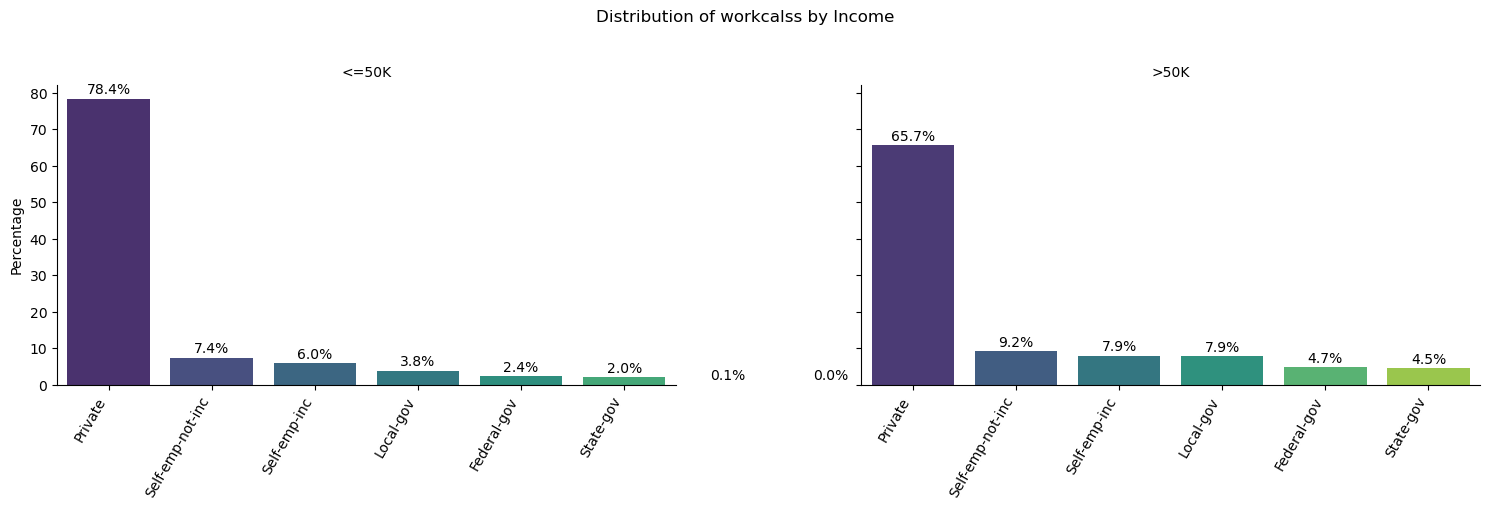

In [292]:
#Before, exporing the work class category and income likelihood, let me explore the distribution
#Calculate percentages within each income category
percentages_df_a = calculate_percentages_within_category(df_raw, 'workclass', 'income')

#Set up the FacetGrid 
g = sns.FacetGrid(percentages_df_a, col="income", height=5, aspect=1.5)

#create a function for the facets
def barplot_with_percentages(data, **kwargs):
    ax = sns.barplot(x='workclass', y='percentage', data=data, palette='viridis', **kwargs)
    
    # Annotate the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

# Map the plotting function to the FacetGrid
g.map_dataframe(barplot_with_percentages)

# Adjust the spacing
g.fig.subplots_adjust(top=0.9, wspace=0.3)

# Add labels and title
g.set_axis_labels('', 'Percentage')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of workcalss by Income', y=1.05)

# Show the plot
plt.show()

In both income categories, majority work within the private sector. However, the percentage working in the private sector for those earning less than or equal to $50,000 is higher than thos earning greater than 50K.

In [365]:
#To test if some work class categories are more likely to earn >50K will need to run a logistic regression
#I prefer to do statistical analysis with R.
df_raw['income'] = df_raw['income'].map({'<=50K': 0, '>50K': 1})
#Export the data for statistical analysis
df_raw.to_csv('Clean_Data/adults_clean.csv')

__Results of Logistic Regression Analysis:__

To review the code and results please check out my R markdown file in this project titles "Statistical Analysis_wk3".

In summary, in comparison to working in Federal government (which was the reference category for the logistic regression),
individuals wo are __self employed in the coporate sector are more likely to earn more than 50K__. __Working in the coporate sector increases the probability of earning more than 50K by 66.7%__. 

Belonging in the rest of the working classes
reduces the probabilty of earning more than 50K. The most least likely are those who work without pay and those who have never worked. 

Working in the Federal government reduces probability of earning more than 50K by 38.6%
The respective order is as follows:

1. Self Employed not incorporated (decrease probability by 61.3%)
2. Local government (decrease probability by 39.8%)
3. State government (decrease probability by 37.2%)
4. Private (reduces probability by 29.7%)
5. Never Worked (decrease probability by 0.00005%)
6. Without pay (decrease probability by 0.00005%)


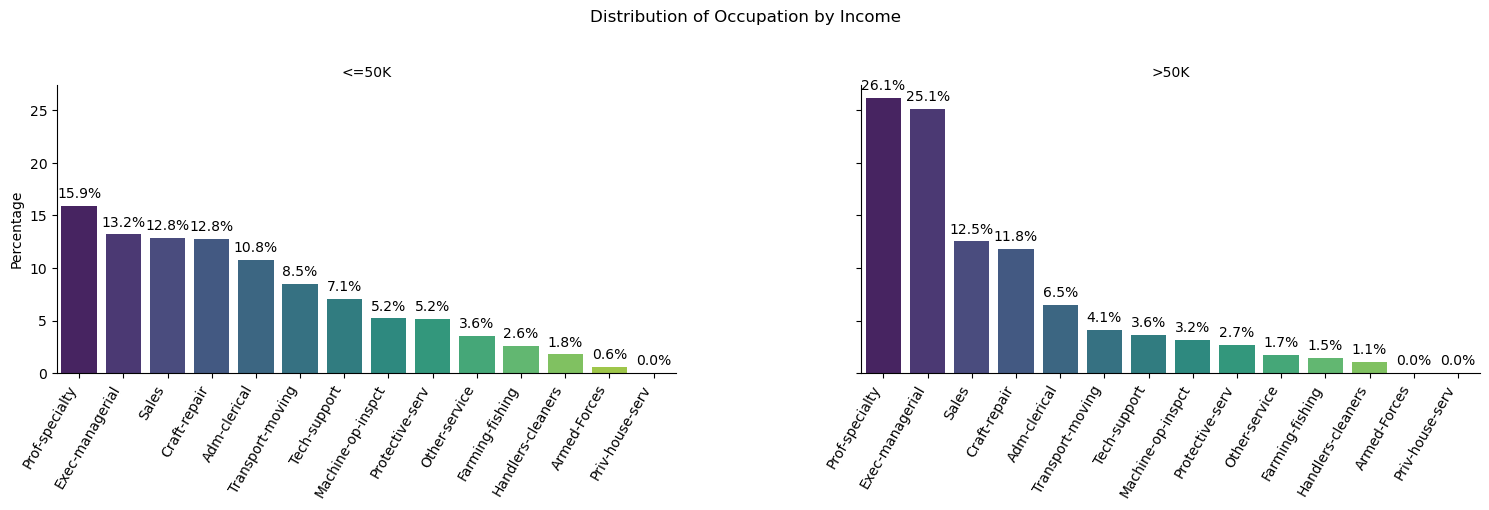

In [384]:
#Now Explore the occupation variable
#Convert back the income variable
df_raw['income'] = df_raw['income'].map({0: '<=50K', 1: '>50K'})
percentages_df_0 = calculate_percentages_within_category(df_raw, 'occupation', 'income')

#Set up the FacetGrid 
g = sns.FacetGrid(percentages_df_0, col="income", height=5, aspect=1.5)

#create a function for the facets
def barplot_with_percentages(data, **kwargs):
    ax = sns.barplot(x='occupation', y='percentage', data=data, palette='viridis', **kwargs)
    
    # Annotate the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

# Map the plotting function to the FacetGrid
g.map_dataframe(barplot_with_percentages)

# Adjust the spacing
g.fig.subplots_adjust(top=0.9, wspace=0.3)

# Add labels and title
g.set_axis_labels('', 'Percentage')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of Occupation by Income', y=1.05)

# Show the plot
plt.show()


__Interpretation__

Majority in both income categories are Prof-speciality and Exec-managerial occupation. Howevwer, there are more of this two occupation categories in the >50K income category (accounting for about 52% of all individuals in the >50K category).
The distribution is more even across the occupation categories in the low income category.


__Results of Logistic Regression:__

After conducting logistic regression in R, It provided the folllowing results.

Working in the administrative clerical occupation lowers the probability of earning more than 50K by 13.4%.

The order of occupation more likely to earn more than 50K (as compared to adiministrative clerical occupation):

1. Exec Managerial ( increase probability by 85.8%)
2. Prof Speciality (increase probability by 77%)
3. Protective Service (increase probability by 75.6%)
4. Tech Support (increase probability by 73.8%)
5. Sales (increase probability by 70%)
6. Craft repair (increase probability by 65.4%)
7. Transport moving (increase probability by 61.7%)

The order of occupation less likely to earn more than 50K (as compared to adiministrative clerical occupation):

1. Machine op inpct (decreases probability by 47.9%)
2. Farming fishing (decreases probability by 45.7%) -Not statistically significant
3. Armed forces (decreases probability by 44.6%) - Not statistically significant
4. Private house service (decreases probability by 41.7%)
5. Handlers cleaners (decreases probability by 30.1%)
6. Other service (decreases probability by 21.8%)


__Q.3: Education and Work Hours:__

- How does the level of education and the number of hours worked per week correlate with income levels?
- 
Is there a significant difference in the education levels and working hours between high-income and low-income earners?

In [403]:
#To answer to question prompt 1, I will do a logistic regression in r then provide results here.



__Results of Logistic Regression:__

When I run a logistic regression model on income versus education level and hours per week, it yields the following results.

Working an additional hour per week increases the probability of one earning more than 50K by 51%.

Having education up to 10th level and working zero hours per week reduces the probability of earning more than 50K by 1.3%

The order by which each education level (as compared to 10th level education) increase the probability of earning more than 50K is as follows:

1. Doctorate (increase probability by 97.1%)
2. Prof school (increase probability by 96.9%)
3. Masters (increase probability by 94%)
4. Bachelors (increase probability by 90%)
5. Assoc voc (increase probability by 82%)
6. Assoc acdm (increase probability by 81.4%)
7. Some College (increase probability by 76.5%)
8. High school grad (increase probability by 71.2%)
9. 12th (increase probability by 55.6%) -Not statistically significant

Having education up to the rest of the categories (11th,1st-4th,5th-6th,7th-8th,9th,Pre-school) all reduce the likelihood of earning more than 50K, however this relationship is not statistically significant.

__Q.3:Bonus:__

Develop a predictive model to determine whether an individual earns more than $50,000 based on the available features in the dataset. Evaluate the model’s accuracy and identify the most significant predictors of income.


In [412]:
#Since this is a classification problem, I will train a logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

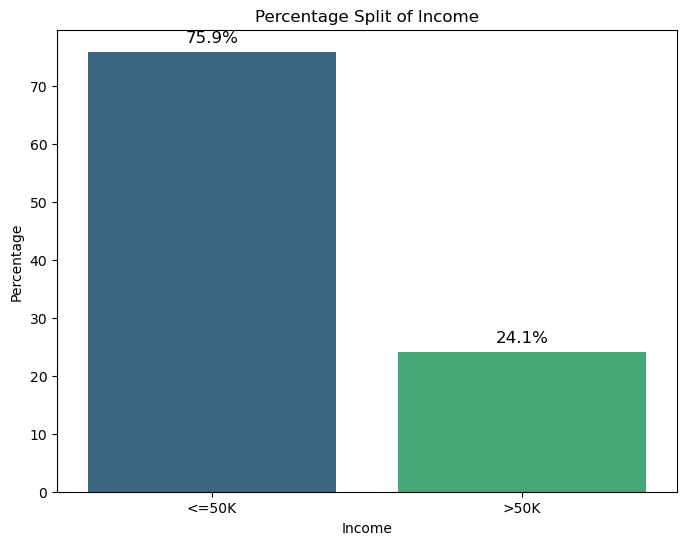

In [491]:
#Create a bar graph for the income variable to understand the split of the income categories.
#This will be helpful to understand if the data is balanced
# Calculate percentage split
income_counts = df_raw['income'].value_counts(normalize=True) * 100
income_percentages = income_counts.reset_index()
income_percentages.columns = ['income', 'percentage']

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='income', y='percentage', data=income_percentages, palette='viridis')

# Annotate the bars with percentage values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                       textcoords='offset points')

# Set titles and labels
plt.title('Percentage Split of Income')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'])

# Show the plot
plt.show()

__Interpretation__

The data is imbalanced with majority of the data points arising from the <=50K category. This will require that I use the F1 Score of Machine learning models as this has a balance of precision and recal, rather than primarily cosidering only the accuracy.

__3.1: Step 1- Data Preprocessing__

In [456]:
# Encode categorical variables
categorical_columns = ['sex', 'race', 'education', 'occupation', 'workclass','marital.status','relationship','native.country']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_raw[column] = le.fit_transform(df_raw[column])
    label_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['capital.gain', 'capital.loss', 'hours.per.week','age','education.num']
df_raw[numerical_columns] = scaler.fit_transform(df_raw[numerical_columns])

#Convert the inceome variable back to a dummy
df_raw['income'] = df_raw['income'].map({'<=50K': 0, '>50K': 1})

# Define features and target
X = df_raw.drop('income', axis=1)
y = df_raw['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

__Step 2: Model building & Evaluation__

In [458]:
# Develope the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')
print('Classification Report:')
print(report)

Accuracy: 0.7574082604022724
ROC AUC Score: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4933
           1       0.00      0.00      0.00      1580

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513



C:\Users\moger\Downloads\conda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moger\Downloads\conda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moger\Downloads\conda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__Interpretation__

The model has an accuracy of 75.74%. The model correctly predicts individuals in the <=50K category at 76%. 

For __class 0( <=50K)__:
Precision of 76% implies that out of all the predictions of class 0 the model made, 76% were correct.
Recall of 1.00 implies that the model correctly identifies all instances of class <=50K from the test set.
F1 score pf 86% implies that since the precision and recall is high, the balance of the two is also high for this class.

For __class 1(>50K)__:
Precision of 0 implies that the model did not correctly predict any instances of class 1.
Recall of 0 also implies that the model did not correctly identify any instance of class 1 from the test set.
F1 score of 0 results from the poor score of the precisiona nd recall.

The weighted average of 57% implies that this model is no better at predicting than a simple 50/50 guess.

 __Verdict__: 
 
 Reject the model and try ensemble models and compare performance!

__Train Second Model to Compare__

In [465]:
#Logistic regression is a great model when classifying a binary outcome.
#However, let me try a more robust model that utilizes an esembel of different classification models, to compare its accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=97)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4933
           1       0.74      0.63      0.68      1580

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513

Random Forest Accuracy: 0.8575157377552587
Random Forest Confusion Matrix:
 [[4585  348]
 [ 580 1000]]


__Train 3rd Model to compare__

In [511]:
#Try XG Boost model to compare
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=73)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))

#To get the best predictors of this model
# Extract feature importances
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

C:\Users\moger\Downloads\conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:07:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4933
           1       0.77      0.65      0.71      1580

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513

XGBoost Accuracy: 0.8697988638108398
XGBoost Confusion Matrix:
 [[4631  302]
 [ 546 1034]]


In [513]:
#Display the best prredictors
display(importance_df)

,feature,importance
7,relationship,0.306625
5,marital.status,0.178874
10,capital.gain,0.144538
4,education.num,0.124338
11,capital.loss,0.058168
9,sex,0.030733
6,occupation,0.028599
0,age,0.028002
12,hours.per.week,0.027753
1,workclass,0.018185


The __top 3 important features__ are __relationship, marital.status,and capital.gain__

In [475]:
#Try Naive bayes classifier and nearest neighbhor classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_encoded)
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, nb_predictions))
print("Naive Bayes Accuracy:", accuracy_score(y_test_encoded, nb_predictions))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test_encoded, nb_predictions))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_encoded)
knn_predictions = knn_model.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test_encoded, knn_predictions))
print("KNN Accuracy:", accuracy_score(y_test_encoded, knn_predictions))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test_encoded, knn_predictions))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4933
           1       1.00      0.02      0.03      1580

    accuracy                           0.76      6513
   macro avg       0.88      0.51      0.45      6513
weighted avg       0.82      0.76      0.66      6513

Naive Bayes Accuracy: 0.7617073545217258
Naive Bayes Confusion Matrix:
 [[4933    0]
 [1552   28]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      4933
           1       0.35      0.18      0.24      1580

    accuracy                           0.72      6513
   macro avg       0.56      0.54      0.53      6513
weighted avg       0.67      0.72      0.69      6513

KNN Accuracy: 0.7207124213112237
KNN Confusion Matrix:
 [[4406  527]
 [1292  288]]


In [477]:
#Try another classifier model
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=67)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4933
           1       0.79      0.60      0.69      1580

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513

Gradient Boosting Accuracy: 0.8656533087670812
Gradient Boosting Confusion Matrix:
 [[4685  248]
 [ 627  953]]


In [483]:
#Try neural networks
from sklearn.neural_network import MLPClassifier

# Initialize and train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=36)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))
print("Neural Network Confusion Matrix:\n", confusion_matrix(y_test, nn_predictions))

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4933
           1       0.73      0.60      0.66      1580

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513

Neural Network Accuracy: 0.8493781667434362
Neural Network Confusion Matrix:
 [[4580  353]
 [ 628  952]]


__Interpretation__

XGBoost and RandomForest accuracy stand out against all the other classification models I have tried out.

__Comparing Xgboost and randomforest__

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4933
           1       0.77      0.65      0.71      1580

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513

XGBoost Accuracy: 0.8697988638108398
XGBoost Confusion Matrix:
 [[4631  302]
 [ 546 1034]]


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4933
           1       0.74      0.63      0.68      1580

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513

Random Forest Accuracy: 0.8575157377552587
Random Forest Confusion Matrix:
 [[4585  348]


  [ 580 1000]]
__Precision 

- The two models tie with a 89% precision for correctly predicting instances of class 0 (<=50K). XGBoost(77%) outperforms randomforest(74%) in predicting class 1(>50K).
- XGBoost outperforms RandomForest with a 94% recall (i.e correctly identifying 94% of instances of class 1(>50K) in the test set, against Random Forest's 93%. Similarly for  class 0 (<=50K), XGBoost outperforms randomforest in class 1(>50K), 65% vs. 63% respectively.
- XG Boost outperforms RandomForest in the F1 score (the weighted score that balances off precision and recall). 92% vs 91% for class 0, and 71% versus 68% for class 1.
- XGBoost accuracy of 86.98% outperforms Random Forest accuracy of 85.75%

__VERDICT__
- Since the data is imbalanced in the outcome variable (income), the F1 score is critical. I will chose XGBoost model since it has the highest F! score, as well as it outperforms the second best model (Random Forest) on all other key metrics.comparison__:


###############__END__###########################